# Machine Learning - introduction

Before diving into core concepts of `Machine Learning`, we would like to give you a brief introduction into `Statistics` and explore differences between `statistical modelling` and `machine learning`.

#### In this lesson you will:

- Understand the difference between `Machine Learning` and `Statistical Modelling`

**Statistical Modelling:**

- Distinguish between **Independent variables** and **Dependent variable**
- Understand two main goals of running Linear Regression - **practical & scientific goal**
- Learn how to fit **Line of Best Fit** using **Ordinary Least Squares** method with `statsmodels`
- Interpret **Regression Coefficients**
- Interpret **Regression Evaulation Metrics** (*p-value* & *R-squared*)

**Machine Learning:**

- Distinguish between **Machine Learning** `algorithm`, **Machine Learning** `model` and **Machine Learning** `task`
- Distinguish between **Supervised** and **Unsupervised** Machine Learning algorithms
- Apply **Linear Regression** algorithm on your dataset with `scikit-learn`
- Split your data into `test` and `training` set
- Evaluate your model on test set using 3 different **evaluation metrics** - MAE, MSE and RMSE
- Train your model on whole dataset and save it

## Machine Learning ≠ sophisticated Statistics 

You may have heard the debate or opinion that `Machine Learning` is simply a more elaborate `Statistics`, that it's basically equal to `Statistics` and that maybe it is just a new fancy name for a thousand-year old concept. Let's agree once and for all: `Machine Learning` is not `Statistics` and let's explore it in detail:

#### 💡 `Statistics` is a **mathematical study of data**

Let's define another important terminology: `Statistics` and `statistical models` are two different things. While `Statistics` is defined as **mathemathical study of data** , `statistical model` is a model for the data that is used either to **infer something about the relationships within the data** or to create a model that is able to **predict future values**. 

#### 💡 `Statistical model` is a model for data that is used to describe **relationships between data**

#### 💡 `Statistical model` can also **predict future values**

To be more explicit, there are lots of `statistical models` that can make predictions (predict future values), but predictive accuracy is **not their core strength**. `Statistical models` are designed for **inference about the relationships between variables** and most often are not focused on predicting future values.



> *The major difference between machine learning and statistics is their purpose. Machine learning models are designed to make **the most accurate predictions possible**. Statistical models are designed for **inference about the relationships between variables**.”*



#### 💡 `Machine Learning model` is designed to make the **most accurate predictions possible**

This is the most common distinction between `Machine Learning` and `Statistical models`, but still not completely satisfactory - **since statistical models and machine learning both can do prediction why do we consider them different from each other?** Let's look at the example of `Linear Regression` in Statistics and `Linear Regresson` in Machine Learning, refresh your knowledge about statistics and get to the core difference between the two concepts.

# Statistical modelling
- ## and the example of Linear Regression approach

There are many different statistical modelling techniques that aim to describe relationships in the data. In this class, we will take a closer look at one of the most popular approach - **Linear Regression**

> **Linear regression** provides a function for modeling the relationship between two (**simple linear regression**) or more variables (**multiple linear regression**).

> **Simple linear regression** models the relationship between one **independent variable** (X or predictor) and one **dependent variable** (Y or outcome) using a **straight line**.

**Linear relationship** exists when the independent variable **increases** (or decreases), the dependent variable **increases** (or decreases) too


#### Language used when describing relationships in linear regression:

- **positive linear relationship** is when X goes up and Y goes up
- **negative linear relationship** is when X goes up and Y goes down

- **X variable** is described as **independent** variable, **predictor**, **input** variable, **explanatory** variable AND **feature** (in ML)
- **Y variable** is described as **dependent** variable, **outcome**, **response** variable AND **label** (in ML)

![im`Age`](static/positive_negative.png)

Let’s first look at our data and check whether the relationship between two variables are good candidate for modelling it with linear regression. 

In [1]:
#Import libraries & Load dataset with Years of Experience, `Age` and `Salary`
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

df = pd.read_csv("Salary.csv")
df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


- Let's visualise relationship between candidate **independent** (`YearsExperience`) and **dependent** (`Salary`) variable:
- Alternatively, let's visualise relationship between **explanatory variable X** (`YearsExperience`) and **response variable Y** (`Salary`):

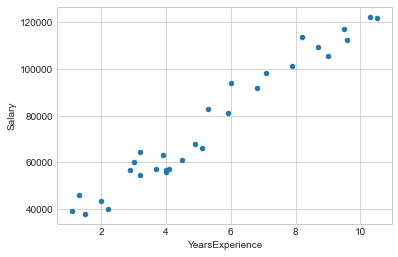

In [2]:
df.plot.scatter(x = "YearsExperience",y = "Salary");

- Let's visualise relationship between the other candidate **independent** (`Age`) and **dependent** (`Salary`) variable:

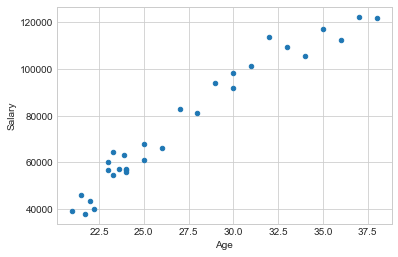

In [3]:
df.plot.scatter(x = "Age",y = "Salary");

We can clearly observe a **positive** (possibly linear) relationship between both `YearsExperience` & `Salary` and `Age` & `Salary`:

- **higher values** for `YearsExperience` correspond to **higher values** for `Salary` - the more experience a person has, the higher the `Salary` is

- **higher values** for `Age` correspond to **higher values** for `Salary` - the older a person is, the higher the `Salary` is

Observing this kind of relationship makes it justifiable to try to implement **Linear Regression**.

### What are the goals of modelling the data with Linear Regression?

Let's start with simple linear regression and take only one **independent variable** (`YearsExperience`) and one **dependent variable** (`Salary`).

We have 2 main goals that we can possibly accomplish:

1. **Practical Goal** - We could be able to **predict** a `Salary` of an **out-of-sample person** based on his/her number of `Years of Experience` (with a certain level of confidence)
2. **Scientifc Goal** - We could generalise to the whole population and claim scientifically that there is a statistically significant correlation (not causation!) between **Years of Experience** and `Salary` and that this relationship is **positive**.

### How to accomplish those Goals?

We want to define the relationship between `YearsExperience` and `Salary` and be able to measure it **mathematically**.

For this we need to find a **line of best fit** - we need to find a straight line on XY axis which is best at describing the relationship between those two variables.

In other words, we want to know what **straight line** best predicts the trend in mean values of Y over values of X?

We will find this best line using a method: **Ordinary Least Squares** - fitting the line in which sum of squared distances from our observation to the line are the smallest.

Since it's linear regression, our function (line with best fit) will have the following formula:

![equation](static/equation.png)

where:
- **C** is an intercept of a function (value for Y when X is zero)
- **B** is a slope that defines how much does Y change in response to one unit change in X

With the help of the above regression function, knowing the **Constant** and **B coefficient** we will be able to predict `Salary` given `YearsExperience`

What exact values should **C** and **B** take in order to model the relationship between `YearsExperience` and `Salary` that will produce best outcomes?

![im`Age`](static/best_fit.png)

Let's use **Ordinary Least Squares** method to find optimal values for those coefficients:

Observe how changing the slope of the line changes the Average of Squared Errors (squared distances from observations to fitted line)

<div>
<img src="static/ols.gif" width="500"/>
</div>

We do not need to program this procedure ourselves - python package `statsmodels` will do it for us. The method for finding the line is called *Least Squares*. 

Let's go through all steps of statistical modelling:

## Statistical Modelling with `statsmodels`

### 1. Define your independent (X) variable and dependent (Y) variable

In [4]:
X = df['YearsExperience']
Y = df['Salary']

Add a constant to your function

In [5]:
X = sm.add_constant(X) # this function just defines that we would like to include a Constant in our function.

### 2. Model the relationship between `YearsExperience` and `Salary`
 - this is where line of the best fit is found

In [6]:
model = sm.OLS(Y,X)

Save results (covariance matrix) in a new variable - results

In [7]:
results = model.fit()

### 3. Interpret model coefficients (function's parameters)

In [8]:
results.params

const              25792.200199
YearsExperience     9449.962321
dtype: float64

**C** equals 25792 and **B** coefficient equals 9450. Therefore, our function looks like this:

![equation2](static/equation2.png)

How to interpret regression coefficients?

- Y equals 25792 if X equals zero.
- In other words, a person with **0** Years of Experience earns (on average) **25.8k** per year.

- For a person with **1 year experience**, salary equals 25792 + 9450 * 1 = **35.2k** (on average)
- For a person with **2 years experience**, salary equals 25792 + 9450 * 2 = **44.7k** (on average)
- For a person with **3 years experience**, salary equals 25792 + 9450 * 3 = **54.1k** (on average)

- In other words, **every additional year of Experience** means *on average* **9450 higher yearly salary** assuming that *all other factors remain constant*.


### 4. Evaluate your results

Before being fully happy to accomplish our 2 goals, we first need to check:
`
- how confident are we that the coefficients are greater than zero = that `YearsExperience` have non-zero influence on `Salary`? (with the help of *p-value*)
- how well does my model fit the data? (with the help of *R-squared*)

#### **What is p-value?**

I order to understand **p-value** in relation to `linear regression`, it would be good to refresh our knowledge about `Hypothesis Testing`. Let's define our so-called `Null Hypothesis`:

**H0:** *YearsExperience have ZERO effect on Salary.* (in mathematical terms: B coefficient equals zero)

Assuming that the above is true in REALITY, and there is NO effect of YearsExperience on Salary - what is the probability that a randomly created dataset will display a similarly strong or stronger relationship compared to our dataset?

Since we have seen on scatterplot that the data is clearly displaying linear relationship, it is highly unlikely that we will get to similar results due to randomness. But still there is always a chance that our data could form in this way due to randomness and thanks to p-value we can get to this probability, mainly:

In [9]:
results.pvalues

const              5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [10]:
print("p-value for C equals" , '{:.20f}'.format(results.pvalues[0]))

p-value for C equals 0.00000000000551195027


In [11]:
print("p-value for B equals" , '{:.20f}'.format(results.pvalues[1]))

p-value for B equals 0.00000000000000000001


> NOTE: In some cases, interpreting the constant (or p-value for constant) is not meaningful especially when X doesn't start at zero or when C turns out to be negative.

**p-value is extremely low** and we can definietly conclude that we can **reject the Null Hypothesis that YearsExperience have no influence on Salary** - in other words : the chance that if Null Hypothesis was true, our data will display similarly strong or stronger relationship is extremely low.

Setting up a treshold on p-value depends on the nature of the problem and your data - usual agreed upon treshholds in statistics are:
- p-value < 0.05
- p-value < 0.01
- p-value < 0.001

The **lower** the treshold, the **more confidence** we get in our results.

In [12]:
#If you are interested in t-test statistics results, you can also look them up and learn about t-test and p-value here: https://www.omnicalculator.com/statistics/t-test:

#results.tvalues

#### **What is R-squared?**

**R-squared** measures the proportion of the variance in the response variable (`Salary`) that can be explained by the predictor variable (`YearsExperience`) in a regression model.

**How does it differ from Correlation?**

**Correlation** explains the strength of the relationship between an **independent** and **dependent variable**, **R-squared** explains to what extent the variance of one variable explains the variance of the second variable.

> NOTE: **R-Squared** only works as intended in a simple linear regression model with one explanatory variable. With a multiple regression made up of several independent variables, the R-Squared must be *adjusted*. (We use a formula: *adjusted R-squared*)

> NOTE: **R-squared** will give you an estimate of the relationship between movements of a dependent variable based on an independent variable's movements. It doesn't tell you whether your chosen model is good or bad, nor will it tell you whether the data and predictions are biased.

**R-squared** takes values from **0-1**, so R-squared of 0.5 would mean that half (50%) of variance in response variable is explained by the input variable.

Generally, you want your R-squared to be **as high as possible** - Depending on the field of study, good R-squared could be 0.9, 0.8, but in some fields 0.4 is considered a good R-squared.

In [13]:
results.rsquared

0.9569566641435086

**R-squared** of our model is 0.957 - meaning that **95.7%** of the variation in `Salary`can be explained by `YearsExeprience`.

Since both **p-value** and **R-squared** have desirable values (p-value below 0.01 and R-squared above 90%) we can safely accomplish our TWO goals:

1. **Practical Goal** - We could be able to **predict** a `Salary` of an **out-of-sample person** based on his/her number of `Years of Experience`. For example a person with 2 YearsExperience will on average have 44.7k Salary.

2. **Scientifc Goal** - We could generalise to the whole population and claim scientifically that there is a statistically significant correlation (not causation!) between `Years of Experience` and `Salary` (provided that our data is a representative sample to general population - for example if those 30 people (sample) were a randomly chosen members of one department in a corporation (general population))

You can also use a summary() method and display all features of our regression model:

In [14]:
#print_model = results.summary()
#print(print_model)

> NOTE: Before jumping to results, we also need to satisfy 4 core assumptions about our data. (check them here: https://mickteaching.wordpress.com/2016/04/19/data-need-to-be-normally-distributed-and-other-myths-of-linear-regression/). We will not go through those steps here and just assume that our data adheres to those assumptions.

# Machine Learning
- ## and the example of Regression `task`

#### What is Machine Learning:

Machine learning is a branch of artificial intelligence (AI) and computer science which uses data and algorithms to predict future values or imitate the way that humans learn, with the goal of gradually improving the accuracy of predictions.

#### Why do I want to do Machine Learning modelling?

- Main objective of Supervised Machine Learning modelling is to help us predict (with the highest possibly accuracy) the values of the Y variable for a given set of X variables (future values).
 
- Main objective of unsupervised Machine Learning modelling is to get insights (knowledge) from data. In the case of unsupervised models - the machine actually *learns* itself and determines what is different or interesting from the dataset.

#### What is the difference between **Machine Learning** `algorithm` and **Machine Learning** `model` and **Machine Learning** `task`?

- An `algorithm` in machine learning is a procedure that is run on data to create a machine learning `model`.

- Machine learning `algorithms` perform **pattern recognition**. Algorithms **learn** from data, or are **fit** on a dataset.

We use different `algorithms`, for different kinds of Machine Learning `tasks`. 

- We use **Linear Regression** `algorithm` for **Regression** `task` - Regression is a *task of predicting a continuous quantity*.
- We use **K-nearest neighbours** `algorithm` for **Classification** `task` - Classification is a *task of predicting a discrete class label*.
- We use **K-means** `algorithm` for **Clustering** `task`- Clustering is a *task* of dividing data points into groups




Other example of Machine Learning algorithms: Logistic Regression, Decision Tree, Artificial Neural Network, Naive Bayes, SVM, Random Forest.

What is a **Machine Learning** `model`?

- A `model` is the **object** that is saved after running a machine learning algorithm on training dataset and represents the **rules**, **numbers**, and other **algorithm-specific information** that facilitate creating predictions.

 - A `model` represents what was learned by a machine learning algorithm - it is the **output** of ML algorithm.
 
 To illustrate an example:
 
In a **Regression** `task`, the linear regression `algorithm` results in a `model` that provides us with specific coefficients of the regression line that enable us to make predictions.

![algorithm](static/algorithm.png)

source: https://blogs.bmj.com/technology/files/2017/05/data-algorithm-model.png

#### Should I use `supervised` or `unsupervised` Machine Learning `algorithm`?

- **Supervised ML** is when we have prior knowledge of what the output values for our samples should be. Therefore, the goal of supervised learning is to learn a function that, given a sample of data and desired outputs, best approximates the relationship between input and output observable in the data.

Most common `tasks`in supervised learning are **Regression** and **Classification** with corresponding `algorithms`: logistic regression, SVMs, artificial neural networks, naive bayes, and random forests.

- **Unsupervised ML** is when we want to learn the inherent structure of our data without using explicitly-provided labels (we do not have Y)

Among most common `tasks` within unsupervised learning are **clustering**, **representation learning**, and **density estimation**. 


#### Which Machine Learning `algorithm` should I use?

Since we already examined that our data follows a linear relationship, let's take up on **Regression** `task` and run a **Linear Regression** `algorithm`.

**Linear Regression** `algorithm` will run on the data with the objective to optimize - adjust the **slope** and **constant**, to achieve maximum efficiency by minimizing the amount of error, measured by the sum of squared errors.

**Linear Regression** seeks to find the line that best fits the observed data. It defines the best line as the one that minimises the Sum of Squared Errors (Sum of squared distances from observations to fitted line).

<div>
<img src="static/ols.gif" width="500"/>
</div>

Linear Regression algorithm, as other ones have its advantages and disadvantages:

- **Advantages**: very fast, no model tuning required, easily interpretable and understood by anybody with a little bit of statistical background
- **Disadvantages**: rather unlikely to produce the most accurate predictions for many real-life scenarios since often there is no linear relationship between features and response variable

#### How do I fit the best line with Linear Regression?

Linear regression function for our case will look as follows. We will use this time Multiple Linear Regression and include both variables, `YearsExperience` and `Age`:

![equation](static/equation_multiple.png)

**C** is a constant, **B1** and **B2** are model coefficients. Their values will be *learned* during the model fitting step using "least squares" criterion. The fitted values will be then used to make predictions (same as in the previous statistical modelling example)

In the previous statistical modelling example we used OLS method (Ordinary Least Squares) to find the minimum sum least squares. In machine learning, we often use a method called **Gradient Descent** to find the minimum average of error. In a case of Linear Regression, both methods will yield the same (or similar) results. If you are interested in how Gradient Descent is calculated in Linear Regression, read this article: https://medium.com/@minions.k/gradient-descent-algo-d7b180605d7c#:~:text=Gradient%20descent%20is%20an%20optimization,the%20parameters%20of%20our%20model.

For the purposes of this course, we will trust the the optimisation algorithm finds the smallest sum fo squared distances. Let's get to coding:


## Machine Learning with scikit-learn

In [15]:
from sklearn.linear_model import LinearRegression #import Linear Regression module

In Machine Learning we tend to call independent variables - `features` and dependent variable -`outcome` or `label` (in classification tasks).

Let's recall how our dataset looks like:

In [16]:
df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


> *Can you tell which variables would be called features and which an outcome?*

### 1. Define features

Let's define features of our model. This time we make it just a little bit more advanced and add both variables - `YearsExperience` and `Age`:

In [17]:
#Define feture columns

features_cols = ["YearsExperience", "Age"]

#Select a subset of our dataframe:

X = df[features_cols]

X.head()

,YearsExperience,Age
0,1.1,21.0
1,1.3,21.5
2,1.5,21.7
3,2.0,22.0
4,2.2,22.2


In [18]:
#Examine type and shape
print(type(X))
print("Shape of features dataframe:", X.shape)

<class 'pandas.core.frame.DataFrame'>
Shape of features dataframe: (30, 2)


### 2. Define outcome variable

In [19]:
#Select a subset of dataframe
y = df["Salary"]
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [20]:
#Examine type and shape
print(type(Y))
print("Shape of outcome variable Series:", Y.shape)

<class 'pandas.core.series.Series'>
Shape of outcome variable Series: (30,)


Note: `scikit-learn`works best with `numpy` arrays and matrices - for now we will stick with `pandas`data frame and Series for simplicity, but usually you will convert your data into numpy arrays and matrices.

### 3. Split X and y into training and test set

We need to devide our dataset into **training** and **test** set in order to be able to **evaluate model performance** on unseen dataset. Luckily, we have a handy `train_test_split`function that comes with `scikit-learn``

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.25)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22, 2)
(8, 2)
(22,)
(8,)


### 4. Fit Linear Regression

Let's import Linear Regression module, instatiate the algorithm and fit the model with our data. Notice that we only use training set - X_train and y_train

In [24]:
from sklearn.linear_model import LinearRegression #import Linear Regression module

algorithm = LinearRegression() #instantiate the algorithm

model = algorithm.fit(X_train, y_train) #train machine learning model - learn the coefficients

Every ML `algorithm` differs in terms of what occurs in the fitting step. In `Linear Regression`, the `model` is **learning the intercept** (constant) **and coefficient** for the **line of best fit** that will be later used to make predictions.

### 5. Interpret model coefficients

After training the model we can access two objects from the resulting Linear Regression Model - intercept_ and coef_. This is all we need to be able to write a formula of our regression function

In [25]:
#Examine intercept and coefficient
print(model.intercept_)
print(model.coef_)

-3880.9284303539025
[6242.8739009  1681.88351597]


In [26]:
list(zip(features_cols, model.coef_)) # More readable output

[('YearsExperience', 6242.873900895835), ('Age', 1681.8835159693774)]

> `intercept_` and `coef_` attributes of the model object have underscore - it's a `scikit-learn`convention to add _ to any attributes that have been estimated by the model.

![equation](static/equation_ml.png)

How to interpret regression coefficients in Multiple Linear Regression?

- Constant(intercept) is not interpretable in this case: Y cannot be negative when X equals zero - a person with **0** Years of Experience cannot earn a negative Salary


For example:

- A person with **1 year experience** and **35 years old** will have a salary of -3881 + 6243 * 1 + 1682 * 35 = **61.2k** (on average)

In more general terms:

- a unit increase in `YearsExperience` will on average cause 6.2k increase in `Salary` provided that `Age` stays constant.

- For a person of a given `Age`, one additional `Year of Experience` will on average be associated with **6.2k increase** in `Salary`. (*Age stays the same, Years of Experience changes*)

- a unit increase in `Age` will on average cause **1.7k increase** in `Salary` provided that `Years of Experience` stays constant.

### 6. Make predictions on test set

Once we have our regression line, it is time to use the model and predict the Y values based on the input from the test set:
- X values from test set are known - we input them into the model
- We predict Y values (y_pred) according to the model's regression function

In [27]:
y_pred = model.predict(X_test)

Let's visualise how far are our predictions to actual values from the test set

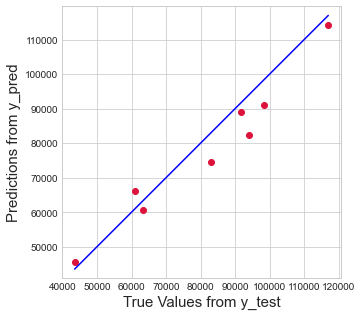

In [28]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values from y_test', fontsize=15)
plt.ylabel('Predictions from y_pred', fontsize=15)
plt.axis('equal')
plt.show()

### 7. Evaluate predictions

This is the moment when `Machine Learning` actually differs from `Statistical modelling`. In `Machine Learning`, we are not scientific, hence not interested in finding out *p-value* or *R-squared* that are needed to prove statistical significance.

In Machine Learning, we are interested in **how well our model performs on unseen data**.

- We are **training** the model using only the subset of our data - **training set**. (*Only 22 out of 30 examples in our case*)

- Then we examine how close are the **predictions** of the model to **actual data** from the **test set**

We cannot evaluate the performance of the model until we **test** it on additional data that was not present durint training.

The purpose of machine learning, in this case, is to **obtain the best performance on the test set**.

In classification problems, you will use **Accuracy** as a core ML evaluation metric. For regression problem, we need an evaluation metric designed for comparing **continous values**.

#### I. Mean Absolute Error (MAE)

- mean of the absolute values of the errors

In [29]:
#Example for calculating MAE

true_values = [10, 20, 30, 40 ]
prediction  = [8, 24, 28, 30 ]

#Calculate MAE by hand:

MAE = (2 + 4 + 2 + 10) / 4
print(MAE)

4.5


In [30]:
metrics.mean_absolute_error(true_values, prediction) #Call a function to calculate MAE

4.5

- Let's calculate **MAE** of our predictions:

In [31]:
metrics.mean_absolute_error(y_test,y_pred)

5325.569976271993

#### II. Mean Squared Error (MSE)

- mean of the squared values of the errors

In [32]:
#Calculate MSE by hand:
MSE = (2**2 + 4**2 + 2**2 + 10**2)/4
print(MSE)

31.0


In [33]:
metrics.mean_squared_error(true_values, prediction) #Call a function to calculate MSE

31.0

- Let's calculate **MSE** of our predictions:

In [34]:
metrics.mean_squared_error(y_test, y_pred)

39037193.73187669

#### III. Rooted Mean Squared Error (RMSE)

- mean of the square root of the mean of squared values of the errors

In [35]:
#Calculate MSE by hand:
RMSE = np.sqrt((2**2 + 4**2 + 2**2 + 10**2)/4)
print(RMSE)

5.5677643628300215


In [36]:
np.sqrt(metrics.mean_squared_error(true_values, prediction)) #Call a function to calculate RMSE

5.5677643628300215

- Let's calculate **RMSE** of our predictions:

In [37]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

6247.975170555394

Which evaluation metric is the best?

- **MAE** is the **easiest to understand** since it is an average error
- **MSE** is used more often, because it *punishes* large errors by squaring the results
- **RMSE** is the **most popular**, because it is **interpretable in Y units**.

In other words, **RMSE** means that our predictions of Salary **differ from reality** by **6.2k** on average.

#### 8.Train your final model on whole dataset

If you are happy with the results of your model and would like to use it in *production*, it's important to retrain the model on the whole dataset to get even more accurate predictions of future, unknown values

In [38]:
algorithm = LinearRegression() #instantiate the algorithm

model_final = algorithm.fit(X, y) 

y_final_pred = model.predict(X)

## Machine Learning compact version

We can fit all the machine learning steps in only couple of lines of code:

In [39]:
df = pd.read_csv("Salary.csv") #Read dataframe

X = df[["YearsExperience", "Age"]] #Define features
y = df["Salary"] #Define outcome variable

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) #Split data into train and test

algorithm = LinearRegression() #instantiate the algorithm
model = algorithm.fit(X_train, y_train) #train machine learning model - learn the coefficients

y_pred = model.predict(X_test) #Make predictions using data from X_test
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred)) #Evaluate the model

model_final = algorithm.fit(X, y) #train the model on whole dataset

### TASK
> Is `YearsExperience` alone, `Age` alone or `YearsExperience` and `Age` taken together best at predicting Salary?
1. Run two ML Linear Regression models - one for `YearsExperience` and `Salary` and the other for `Age` and `Salary`.
2. In which model (Simple or Multiple Linear Regression) `YearsExperience` has stronger influence on `Salary`?
3. Evaluate performance of all 3 models - Which model has the lowest RMSE?
4. Would you expect RMSE to decrease or increase when you reduce the size of test set?
5. What is overfitting in ML? Read about the concept in online sources and think what could cause your model to overfit the data?

## Difference between Statistical Modelling and Machine Learning revisited

Machine learning is built upon a statistical framework.

- The purpose of (supervised) machine learning is obtaining a model that can make repeatable predictions. In ML you typically do not care if the model is interpretable (p-value, R-squared)
- Machine learning is all about results - likely applied in result-orientated work environments.
- Statistical modeling is about finding relationships between variables and the significance of those relationships, whilst also catering for prediction - likely used in research centers and universities

- In traditional statistical approaches, there is no concept of a training and test set and calculating performance of the model on unseen data -  there are different metrics to help us examine how our model performs

- Evaluation procedure in Statistical Modelling and  different but both methods are able to give us results that are statistically robust.